## QUESTION 1 (DATA PROCESSING)

In [37]:
import pandas as pd 
dataset = pd.read_csv("Housing.csv")
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [38]:
numeric_columns = ['price','area','bedrooms','bathrooms','stories','parking']
categorical_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].mean())
dataset[categorical_columns] = dataset[categorical_columns].fillna(dataset[categorical_columns].mode().iloc[0])
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['mainroad'] = label_encoder.fit_transform(dataset['mainroad'].astype(str))
dataset['guestroom'] = label_encoder.fit_transform(dataset['guestroom'].astype(str))
dataset['basement'] = label_encoder.fit_transform(dataset['basement'].astype(str))
dataset['hotwaterheating'] = label_encoder.fit_transform(dataset['hotwaterheating'].astype(str))
dataset['airconditioning'] = label_encoder.fit_transform(dataset['airconditioning'].astype(str))
dataset['prefarea'] = label_encoder.fit_transform(dataset['prefarea'].astype(str))
dataset['furnishingstatus'] = label_encoder.fit_transform(dataset['furnishingstatus'].astype(str))
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
normalized_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0


In [40]:
normalized_data['furnishingstatus'] = 1 - normalized_data['furnishingstatus']
# normalized_data.head()
df = normalized_data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0


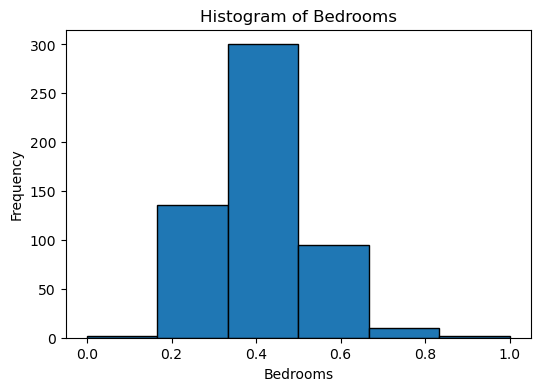

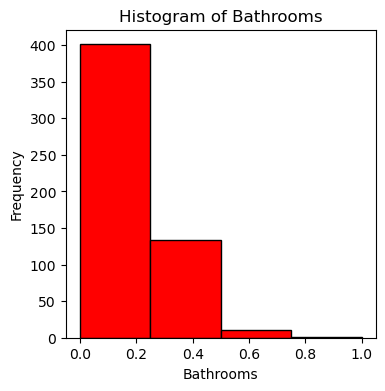

In [108]:

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['bedrooms'],bins=6, edgecolor = 'black')
plt.title('Histogram of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(4,4))
plt.hist(df['bathrooms'],bins=4, color= 'red',edgecolor = 'black')
plt.title('Histogram of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'price')

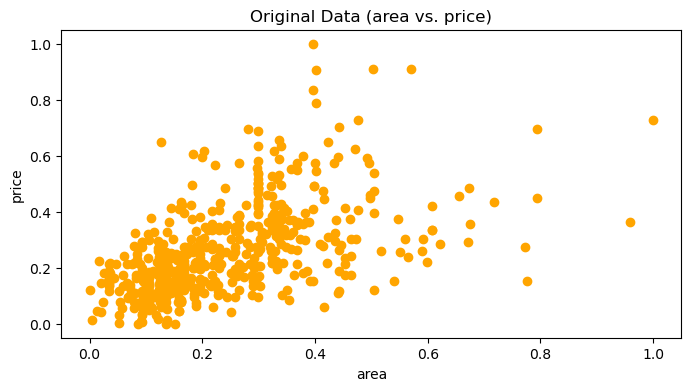

In [42]:
plt.figure(figsize=(8, 4))
plt.scatter(x=df['area'], y=df['price'], color='orange')
plt.title("Original Data (area vs. price)")
plt.xlabel("area")
plt.ylabel("price")

In [43]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print("Data set shape:", df.shape)
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Data set shape: (545, 13)
Train set shape: (436, 13)
Test set shape: (109, 13)


### LINEAR REGRESSION IMPLEMENTATION

In [44]:
relation_dict = {}
for i in train_df:
      relation = train_df['price'].corr(train_df[i])
      relation_dict[i] = relation
        

In [45]:
relation_dict

{'price': 1.0,
 'area': 0.5338195476608104,
 'bedrooms': 0.3714147762245417,
 'bathrooms': 0.5325114008895065,
 'stories': 0.4050188381212384,
 'mainroad': 0.3037525074617005,
 'guestroom': 0.2643666171025338,
 'basement': 0.20666086036843262,
 'hotwaterheating': 0.07527323911933301,
 'airconditioning': 0.47057417168038296,
 'parking': 0.37869831476950244,
 'prefarea': 0.2999664066173573,
 'furnishingstatus': 0.3074023629909625}

In [49]:
import numpy as np
x_train = train_df['area'].values
x_test = test_df['area'].values
y_train = train_df['price'].values
y_test = test_df['price'].values
x_tr_lin = x_train
y_tr_lin = y_train


In [47]:

class Linear_reg_scratch:
    
    def fit(self , x_train,y_train):
        x_sum = np.sum(x_train)
        x_mean = x_sum / 436 
        y_sum = np.sum(y_train) 
        y_mean = y_sum / 436 
        x_tslop = x_train - x_mean
        y_tslop = y_train - y_mean
        slopn = x_tslop * y_tslop
        slopd = x_tslop *x_tslop 
        slopn_sum = np.sum(slopn)
        slopd_sum = np.sum(slopd)
        m = slopn_sum / slopd_sum
        b = y_mean - (m*x_mean)
        self.coefficients = (m, b)
        
    def predict(self, X):
        predictions = [self.calc(x) for x in X]
        return np.array(predictions)
      
    def  calc(self,x ):
        m, b = self.coefficients
        y_pred_scratch = (m*x) + b
        return y_pred_scratch
    
model = Linear_reg_scratch()
model.fit(x_train,y_train)
    
y_predictions = model.predict(x_test)
print("Predictions:", y_predictions)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_predictions)
print (mse)
r2 = r2_score(y_test, y_predictions)
print (r2)


# diff = y_test - predictions
# acc_sum =np.sum(diff)

# accuracy =( 1 - (acc_sum/109)) *100
# print (accuracy)

Predictions: [0.28346843 0.30558426 0.21490934 0.25029467 0.21196056 0.3136934
 0.38004091 0.24992608 0.18542155 0.1655173  0.38225249 0.2110022
 0.20311422 0.18026119 0.21232915 0.19979685 0.13971549 0.2871544
 0.28162544 0.2871544  0.25103187 0.31756367 0.20049718 0.206063
 0.37008878 0.43311892 0.1798926  0.17657522 0.55254443 0.17657522
 0.21343495 0.18099839 0.2871544  0.30982313 0.24200123 0.23555078
 0.23724633 0.18320997 0.19426789 0.1687241  0.36013666 0.19979685
 0.30263548 0.22080689 0.31479919 0.28291553 0.2871544  0.23702517
 0.36271684 0.17657522 0.3415225  0.17657522 0.35239612 0.23186481
 0.20016544 0.17325784 0.27793947 0.15445938 0.30374128 0.206063
 0.18320997 0.14469156 0.30337268 0.24882028 0.26356417 0.20458861
 0.30927024 0.17657522 0.37561774 0.27609648 0.17104626 0.3004239
 0.37561774 0.45302317 0.16492755 0.22301848 0.19979685 0.24347562
 0.2871544  0.26135259 0.3004239  0.21638372 0.26872454 0.31185042
 0.12865758 0.28568001 0.16920327 0.1931621  0.33949521 0

In [68]:
x= df[['area']].values
y = df['price'].values
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size =0.2)

### MODEL EVALUATION

In [5]:
import pandas as pd 
dataset = pd.read_csv("Housing.csv")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['mainroad'] = label_encoder.fit_transform(dataset['mainroad'].astype(str))
dataset['guestroom'] = label_encoder.fit_transform(dataset['guestroom'].astype(str))
dataset['basement'] = label_encoder.fit_transform(dataset['basement'].astype(str))
dataset['hotwaterheating'] = label_encoder.fit_transform(dataset['hotwaterheating'].astype(str))
dataset['airconditioning'] = label_encoder.fit_transform(dataset['airconditioning'].astype(str))
dataset['prefarea'] = label_encoder.fit_transform(dataset['prefarea'].astype(str))
dataset['furnishingstatus'] = label_encoder.fit_transform(dataset['furnishingstatus'].astype(str))
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
normalized_data.head()
normalized_data['furnishingstatus'] = 1 - normalized_data['furnishingstatus']
# normalized_data.head()
df = normalized_data
df.head()
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x= df[['area']].values
y = df['price'].values
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size =0.2)
# # Create a linear regression model
lr1 = LinearRegression()

# # Fit the model to the data
lr1.fit(x_train1,y_train1)

# # Make predictions
predictions1 = lr1.predict(x_test1)

# # Print the coefficients and intercept
print("Coefficients:", lr1.coef_)
print("Intercept:", lr1.intercept_)
print("Predictions:", predictions1)

_mse = mean_squared_error(y_test1,predictions1)
print (_mse)
_r2 = r2_score(y_test1, predictions1)
print (_r2)

Coefficients: [0.56164614]
Intercept: 0.12708523790704845
Predictions: [0.25609014 0.34981364 0.17363818 0.22146495 0.24095851 0.28341973
 0.21509577 0.22165796 0.29442105 0.24867873 0.12901529 0.20814757
 0.29886017 0.27955962 0.29500006 0.18730297 0.33977735 0.25176682
 0.21316571 0.31816073 0.16943065 0.20351543 0.21663981 0.18186021
 0.17919674 0.40308317 0.29500006 0.34132139 0.23130823 0.17282755
 0.29500006 0.17881072 0.20370844 0.2023574  0.21200768 0.14619279
 0.14580678 0.37143026 0.31623067 0.17919674 0.21779784 0.44400034
 0.19849729 0.38656189 0.2023574  0.23323829 0.15603607 0.19772527
 0.21779784 0.24481862 0.38185256 0.35676184 0.32086281 0.21741183
 0.27569951 0.12708524 0.21934189 0.29500006 0.1709747  0.41080339
 0.30889646 0.4947608  0.2195735  0.16568635 0.20698953 0.34711156
 0.19926931 0.43473608 0.17340657 0.21663981 0.28836067 0.38185256
 0.21200768 0.50383206 0.39459092 0.14619279 0.21007762 0.4597882
 0.29500006 0.26411918 0.26411918 0.31430062 0.28419175 0.3

In [7]:
import numpy as np
area_test = 0.25
price_pred = lr1.intercept_ + ( lr1.coef_* area_test)
max_price = np.max(dataset['price'])
min_price = np.min(dataset['price'])
price_diff = max_price - min_price
price_prediction = min_price + (price_pred * price_diff)
price_prediction

array([4839587.72301707])

Text(0, 0.5, 'price')

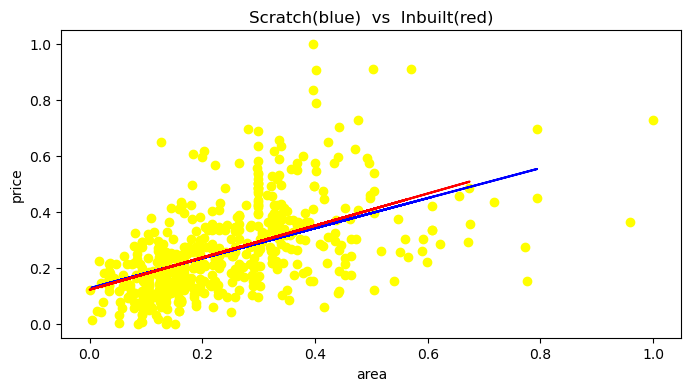

In [83]:
plt.figure(figsize=(8, 4))
plt.scatter(x=df['area'], y=df['price'], color='yellow')
plt.plot(x_test,y_predictions,label='Line Plot', color='blue', linestyle='-')
plt.plot(x_test1,predictions1,label='Line Plot', color='red', linestyle='-')
plt.title("Scratch(blue)  vs  Inbuilt(red)")
plt.xlabel("area")
plt.ylabel("price")

# QUESTION 2 

### DATA PREPROCESSING

In [94]:
dia_df = pd.read_csv("diabetes.csv")
dia_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:
dia_df = dia_df.dropna()
Dugam = dia_df
Dugam.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
519,6,129,90,7,326,19.6,0.582,60,no


In [129]:
def pushkin(x):
    if x==1:
        return "yes"
    else:
        return "no"
    
Dugam['Outcome'] = Dugam['Outcome'].apply(pushkin) 


In [127]:
Dugam

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,no
764,2,122,70,27,0,36.8,0.340,27,no
765,5,121,72,23,112,26.2,0.245,30,no
766,1,126,60,0,0,30.1,0.349,47,yes


In [93]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [138]:
scaler = StandardScaler()
Dugam1 = Dugam.drop('Outcome',axis=1)
stand_data = scaler.fit_transform(Dugam1)

# Convert the scaled data (NumPy array) back to a DataFrame
stand_df = pd.DataFrame(stand_data, columns=Dugam1.columns)

# Now you can use 'head()' to view the first few rows
stand_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


Text(0, 0.5, 'Insulin')

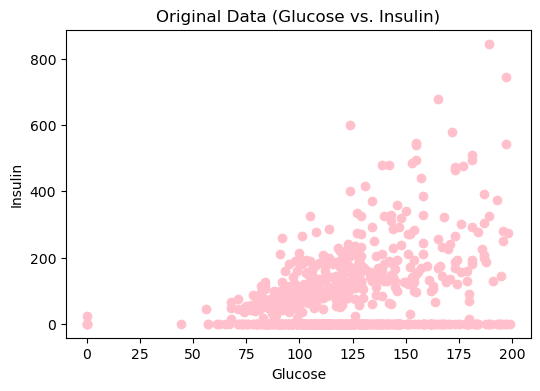

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x=dia_df['Glucose'], y=dia_df['Insulin'], color='pink')
plt.title("Original Data (Glucose vs. Insulin)")
plt.xlabel("Glucose")
plt.ylabel("Insulin")

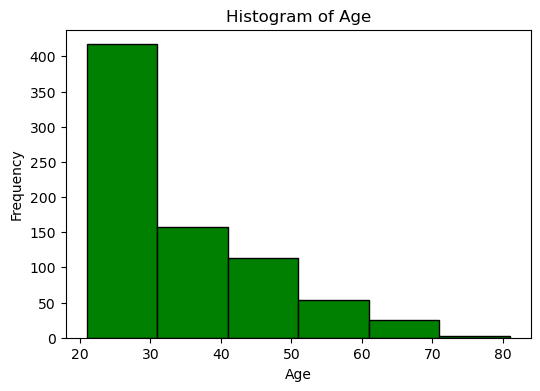

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(dia_df['Age'],bins=6, color='green' ,edgecolor = 'black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [130]:
from sklearn.model_selection import train_test_split
train_diadf, test_diadf = train_test_split(Dugam, test_size=0.2, random_state=42)
print("Data set shape:",Dugam.shape)
print("Train set shape:", train_diadf.shape)
print("Test set shape:", test_diadf.shape)

Data set shape: (768, 9)
Train set shape: (614, 9)
Test set shape: (154, 9)


#### MODEL TRAINING AND EVALUATION

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
dia_df = pd.read_csv("diabetes.csv")
dia_df = dia_df.dropna()
Dugam = dia_df
def pushkin(x):
    if x==1:
        return "yes"
    else:
        return "no"
    
Dugam['Outcome'] = Dugam['Outcome'].apply(pushkin) 
scaler = StandardScaler()
Dugam1 = Dugam.drop('Outcome',axis=1)
stand_data = scaler.fit_transform(Dugam1)

# Convert the scaled data (NumPy array) back to a DataFrame
stand_df = pd.DataFrame(stand_data, columns=Dugam1.columns)

# Now you can use 'head()' to view the first few rows
stand_df.head()

otcm = Dugam['Outcome']

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


from sklearn.model_selection import KFold, cross_val_score
for i in range (3,16,2):
    k_folds = KFold(n_splits = i)
    logistic_model = LogisticRegression()
    lgclfr  = logistic_model.fit(stand_df, otcm)
    scores = cross_val_score(lgclfr, stand_df, otcm, cv = k_folds)
    print("Cross Validation Scores: ", scores)
    print("Average CV Score: ", scores.mean())
    print("Number of CV Scores used in Average: ", len(scores))



Cross Validation Scores:  [0.7734375  0.73828125 0.81640625]
Average CV Score:  0.7760416666666666
Number of CV Scores used in Average:  3
Cross Validation Scores:  [0.77272727 0.72727273 0.75974026 0.83006536 0.77124183]
Average CV Score:  0.7722094898565487
Number of CV Scores used in Average:  5
Cross Validation Scores:  [0.75454545 0.79090909 0.7        0.79090909 0.77272727 0.8440367
 0.7706422 ]
Average CV Score:  0.7748242583104968
Number of CV Scores used in Average:  7
Cross Validation Scores:  [0.72093023 0.81395349 0.76744186 0.68235294 0.81176471 0.76470588
 0.83529412 0.78823529 0.81176471]
Average CV Score:  0.7773825809393524
Number of CV Scores used in Average:  9
Cross Validation Scores:  [0.67142857 0.84285714 0.81428571 0.7        0.67142857 0.8
 0.81428571 0.81428571 0.88571429 0.75362319 0.79710145]
Average CV Score:  0.7786373047242612
Number of CV Scores used in Average:  11
Cross Validation Scores:  [0.66666667 0.84745763 0.84745763 0.74576271 0.6440678  0.72881

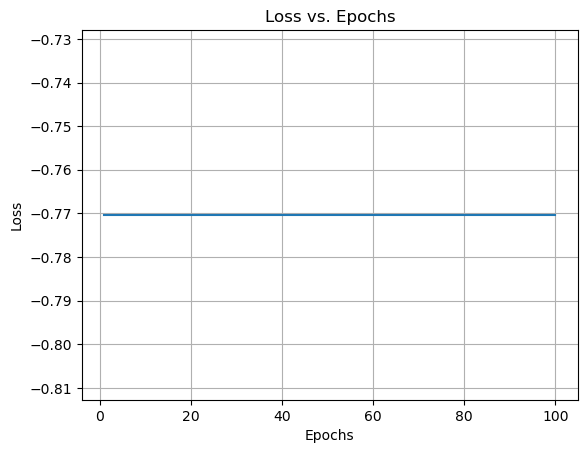

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('logistic', LogisticRegression(solver='lbfgs'))  # Step 2: Logistic Regression
])
# Initialize an empty list to store loss values
losses = []

# Set the number of iterations/epochs you want to run
n_epochs = 100
from sklearn.model_selection import train_test_split
xlg_train, xlg_test, ylg_train, ylg_test = train_test_split(stand_df, otcm, test_size=0.2, random_state=42)
for epoch in range(n_epochs):
    pipeline.fit(xlg_train, ylg_train)
    
    # Calculate and store the loss for this epoch
    loss = -pipeline.score(xlg_train, ylg_train)  # Negative accuracy is used as the loss for logistic regression
    losses.append(loss)

# Plot loss vs. iterations/epochs
plt.plot(np.arange(1, n_epochs + 1), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.grid(True)
plt.show()

In [18]:
lgcustom = stand_df.sample()
ylg1_pred = logistic_model.predict(lgcustom)
print(lgcustom)
print(ylg1_pred)


     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
286     0.342981  1.067404       0.770014       1.471822  4.039288  0.851301   

     DiabetesPedigreeFunction       Age  
286                  0.444331  0.064591  
['yes']
